# 4장 KNN (K-최근접이웃법)

데이터 간의 거리를 측정하여 가까운 k개의 다른 데이터의 레이블을 참조하여 분류하는 방법

우리가 예측하려고 하는 임의의 데이터와 가장 가까운 거리의 데이터 K개를 찾아 다수결에 
의해 데이터를 예측하는 방법임.

거리는 주로 유클리디안 또는 민코브스키 방법을 사용함.

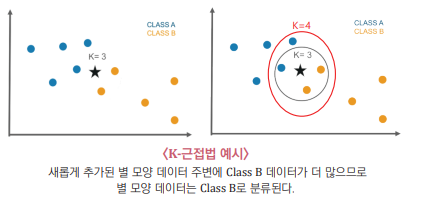

별 데이터로부터 가장 가까운 K개 데이터들이 더 많이 속한 그룹으로 별 모양 데
이터를 분류하는 알고리즘<br>
K가 3이라면 3개의 데이터를 확인해 더 많은 데이터가 있는 B그룹으로 
주어진 임의의 데이터를 분류한다. K의 선택 기준은 학습의 난이도와 데이터의 개수이며, 보통 훈련 데이터<br> 
개수의 제곱근으로 설정한다. (일반적으로 최적의 k 수는 3~10 범위 내이며 제곱근 이외에도 다른 방법을 쓰기도 함)

K값이 작을수록 가장 가까운 1개의 케이스를 참조하기 때문에 더욱 민감하고 정교한 분류와 예측이 가능함. 그러나 <Strong>과대적합</Strong> 가능성이 있음 <br>
반대로 k값이 클수록 주변에 많은 k들의 평균적인 군집과 평균값으로 분류와 예측을 하기때문에 정확도나 성능 지표가 좋지 않을 수 있다. <strong>과소적합</strong> 

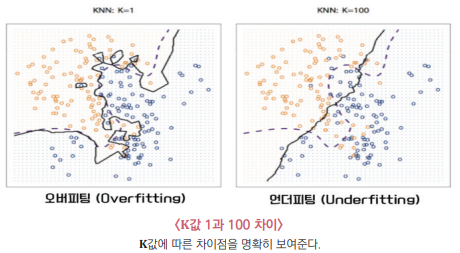

- KNN의 장단점

K-NN알고리즘의 장점은 추가된 데이터의 처리가 쉽고, 예측 결과에 대한 해석도 쉽다는 것이다. <br>
사용이 간단하여 훈련 데이터에 대한 훈련 과정이 별도로 필요하지 않으며, 범주를 나눈 기준을 알지 못하더라도 
데이터를 분류할 수 있다.

반면 훈련 데이터 세트의 크기가 너무 크거나 특성(feature)의 개수가 너무 많으면 연산속도가 느려지는 
단점이 있다. 비수치 데이터의 유사도를 정의하기가 어렵고<br> 이상치의 영향을 크게 받는다. 서로 다른 특성 
값들의 비율을 일정하게 하지 않을 경우 성능이 떨어지기 때문에 같은 스케일(규모)을 갖도록 전처리 하는 
과정이 필수적이다

## 주요 하이퍼파라미터

- n_neighbors: k 개수에 해당 5가 디폴트, 1에 가까울수록 과대적합, 클수록 과소적합

- algorithm : {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’

- p: int, default=2 <br>
Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

- metricstr or callable, default=’minkowski’<br>
The distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. See the documentation of DistanceMetric for a list of available metrics. If metric is “precomputed”, X is assumed to be a distance matrix and must be square during fit. X may be a sparse graph, in which case only “nonzero” elements may be considered neighbors.

## 거리 종류

- Manhattan distance : L1 distance라고 불리며 stepped path 형태를 띤다. 두 점 사이의 거리 좌표상의 절대 차이값들의 합이다.(p=1)<br>


- Euclidean distance : L2 distance라고 불리며 straight line 형태를 띤다. 두 점 사이의 직선거리이다.(p=2)<br>

-  Minkowski distance :  Euclidean과 Manhattan distance을 일반화 한 형태이다. Lp라고 표현할 수 있다.<br>

- Chebychev distance : 한 점으로부터 인접한 8개의 모든 셀들을 같은 거리로 처리하는 것이 다르다.<br>

# 분석 코드 

## Part1. 분류(Classification)

1. 데이터 준비

In [11]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
data1=pd.read_csv('./[1]BigData_data_최종본(0910)/breast-cancer-wisconsin.csv', encoding='utf-8')
X=data1[data1.columns[1:10]]
y=data1[["Class"]]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

##
2. 기본모델 적용

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_scaled_train, y_train)
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.984375

In [14]:
from sklearn.metrics import confusion_matrix
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[331   2]
 [  6 173]]


In [20]:
from sklearn.metrics import classification_report
cfreport_train=classification_report(y_train, pred_train)
print("분류예측 레포트:\n", cfreport_train)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       333
           1       0.99      0.97      0.98       179

    accuracy                           0.98       512
   macro avg       0.99      0.98      0.98       512
weighted avg       0.98      0.98      0.98       512



In [22]:
pred_test = model.predict(X_scaled_test)
model.score(X_scaled_test,y_test)

0.9532163742690059

In [25]:
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[106   5]
 [  3  57]]


In [27]:
cfreport_test=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport_test)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       111
           1       0.92      0.95      0.93        60

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



##
3. 하이퍼파라미터 서치

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11]}
grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11]})

In [35]:
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Score: {:.4f}".format(grid_search.best_score_))
print("TestSet Score: {:.4f}".format(grid_search.score(X_scaled_test, y_test)))

Best Parameter: {'n_neighbors': 3}
Best Score: 0.9824
TestSet Score: 0.9532


 ###

In [40]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {'n_neighbors': randint(low=1, high=20)}

random_search=RandomizedSearchCV(KNeighborsClassifier(),param_distributions=param_distribs, n_iter=20, cv=5)
random_search.fit(X_scaled_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000130AC3498E0>})

In [41]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Score: {:.4f}".format(random_search.best_score_))
print("TestSet Score: {:.4f}".format(random_search.score(X_scaled_test, y_test)))

Best Parameter: {'n_neighbors': 4}
Best Score: 0.9804
TestSet Score: 0.9415


#

## Part2. 회귀(Regression) 

1. 데이터 준비

In [44]:
data2=pd.read_csv('./[1]BigData_data_최종본(0910)/house_price.csv', encoding='utf-8')
X=data2[data2.columns[1:5]]
y=data2[["house_value"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

2. 기본모델 적용

In [46]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor()
model.fit(X_scaled_train, y_train)
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.6804607237174459

In [47]:
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.5541889571372401

In [48]:
# RMSE (Root Mean Squared Error)
import numpy as np
from sklearn.metrics import mean_squared_error 
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print("훈련   데이터 RMSE:", np.sqrt(MSE_train))
print("테스트 데이터 RMSE:", np.sqrt(MSE_test))

훈련   데이터 RMSE: 53952.69804097723
테스트 데이터 RMSE: 63831.91662964773


3. 하이퍼파라미터 서치

In [50]:
param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11]}
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11]})

In [51]:
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Score: {:.4f}".format(grid_search.best_score_))
print("TestSet Score: {:.4f}".format(grid_search.score(X_scaled_test, y_test)))

Best Parameter: {'n_neighbors': 11}
Best Score: 0.5638
TestSet Score: 0.5880


###

In [53]:
param_distribs = {'n_neighbors': randint(low=1, high=20)}
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(KNeighborsRegressor(), 
                                 param_distributions=param_distribs, n_iter=20, cv=5)
random_search.fit(X_scaled_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=20,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000130AB597460>})

In [54]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Score: {:.4f}".format(random_search.best_score_))
print("TestSet Score: {:.4f}".format(random_search.score(X_scaled_test, y_test)))

Best Parameter: {'n_neighbors': 17}
Best Score: 0.5749
TestSet Score: 0.5971
